 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [3]:
#Create a path for Whale Returns

In [4]:
whale_path=Path("Resources/whale_returns.csv")

In [5]:
# Reading whale returns
whale_df=pd.read_csv(whale_path)
#Quick check of data
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [6]:
# Count nulls
whale_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [7]:
# Drop nulls
whale_df = whale_df.dropna()
#Check null count again
whale_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [8]:
# Create path for Algorithmic daily returns
algo_path=Path("Resources/algo_returns.csv")

# Reading algorithmic returns
algo_df=pd.read_csv(algo_path)

#Quick check of the data
algo_df.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [9]:
# Count nulls
algo_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls
algo_df=algo_df.dropna()
# Check nulls count again
algo_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
#Create path for S&P TSX 60 Returns
sp_path=Path("Resources/sp_tsx_history.csv")
# Reading S&P TSX 60 Closing Prices
sp_df=pd.read_csv(sp_path)
#Quickly check data
sp_df.head()

,Date,Close
0,1-Oct-2012,"$12,370.19"
1,2-Oct-2012,"$12,391.23"
2,3-Oct-2012,"$12,359.47"
3,4-Oct-2012,"$12,447.68"
4,5-Oct-2012,"$12,418.99"


In [12]:
# Check Data Types
sp_df.dtypes

Date     object
Close    object
dtype: object

In [13]:
# Fix Data Types

#Firstly, "$" and "," will be taken out
sp_df["Close"]=sp_df["Close"].str.replace("$","")
sp_df["Close"]=sp_df["Close"].str.replace(",","")

#Convert "Close" data type from "object" to "float"
sp_df["Close"]=sp_df["Close"].astype("float")

#Check data type again
sp_df.dtypes

C:\Users\Ha D T Nguyen\miniconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


Date      object
Close    float64
dtype: object

In [14]:
#Set date as index
sp_df.set_index(pd.to_datetime(sp_df['Date'], infer_datetime_format=True), inplace=True)
sp_df.head()

#Drop extra "Date" column
sp_df.drop(columns=['Date'], inplace=True)
sp_df.head()

# Calculate Daily Returns
dreturn_sp = sp_df.pct_change()
dreturn_sp.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [15]:
# Drop nulls
dreturn_sp=dreturn_sp.dropna()

In [16]:
# Rename `Close` Column to be specific to this portfolio.
sp_column=["S&P TSX"]
dreturn_sp.columns = sp_column
dreturn_sp.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
#whale_df and algo_df need to be indexed with Date before being combined with S&P TSX

#Set Date as index for whale_df
whale_df.set_index(pd.to_datetime(whale_df['Date'], infer_datetime_format=True), inplace=True)
#Drop extra "Date" column from whale_df
whale_df.drop(columns=['Date'], inplace=True)
whale_df.head()

#Set Date as index for algo_df
algo_df.set_index(pd.to_datetime(algo_df['Date'], infer_datetime_format=True), inplace=True)
#Drop extra "Date" column from algo_df
algo_df.drop(columns=['Date'], inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [18]:
# Join whale_df, algo_df and dreturn_sp dataframes by columns axis
joined_df = pd.concat([whale_df, algo_df, dreturn_sp], axis='columns', join='inner')
joined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

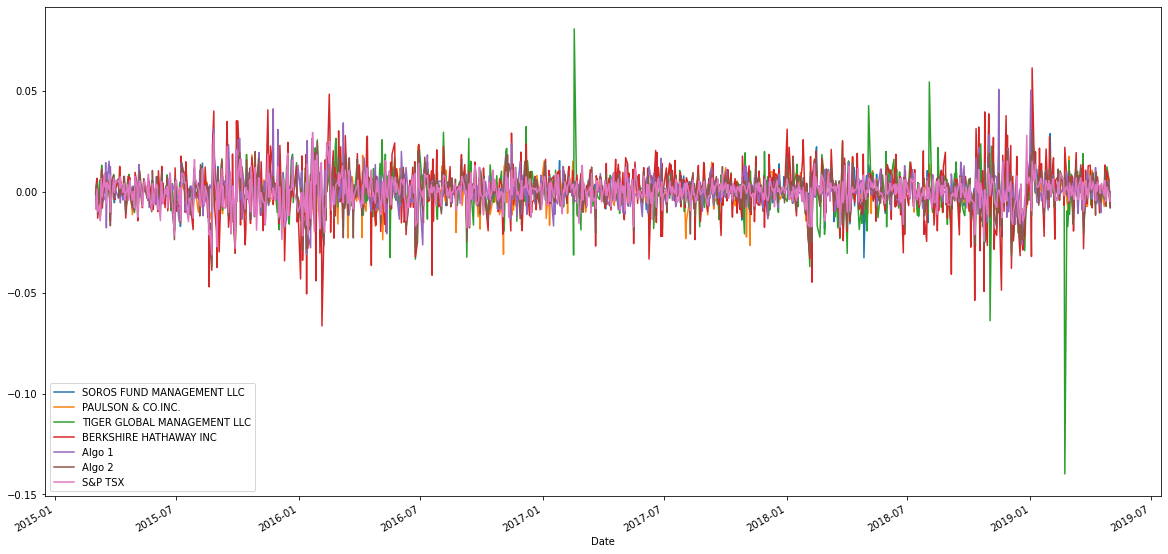

In [19]:
# Plot daily returns of all portfolios
joined_df.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

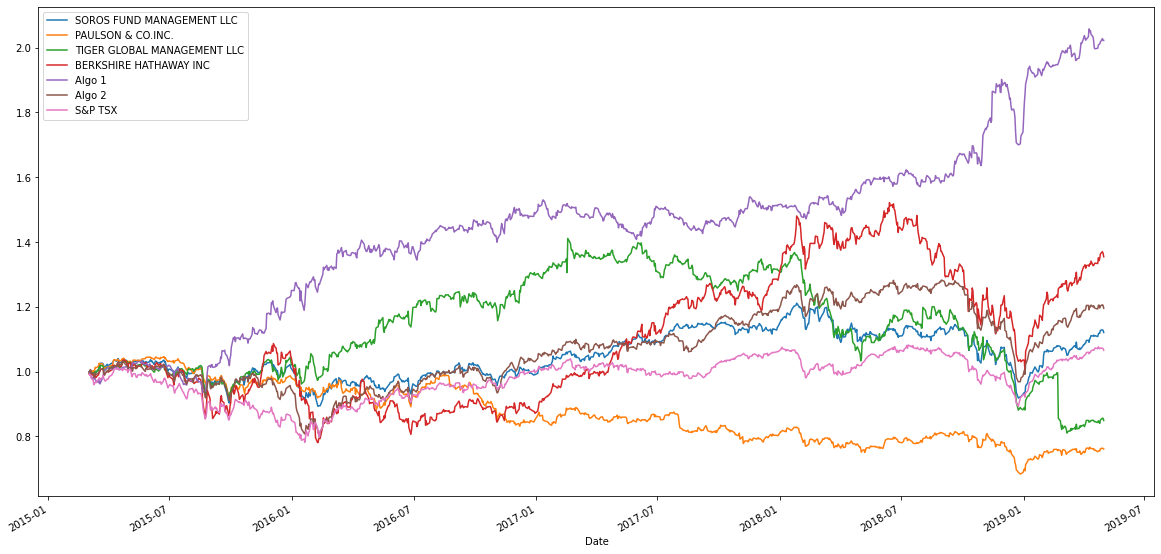

In [20]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + joined_df).cumprod()
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

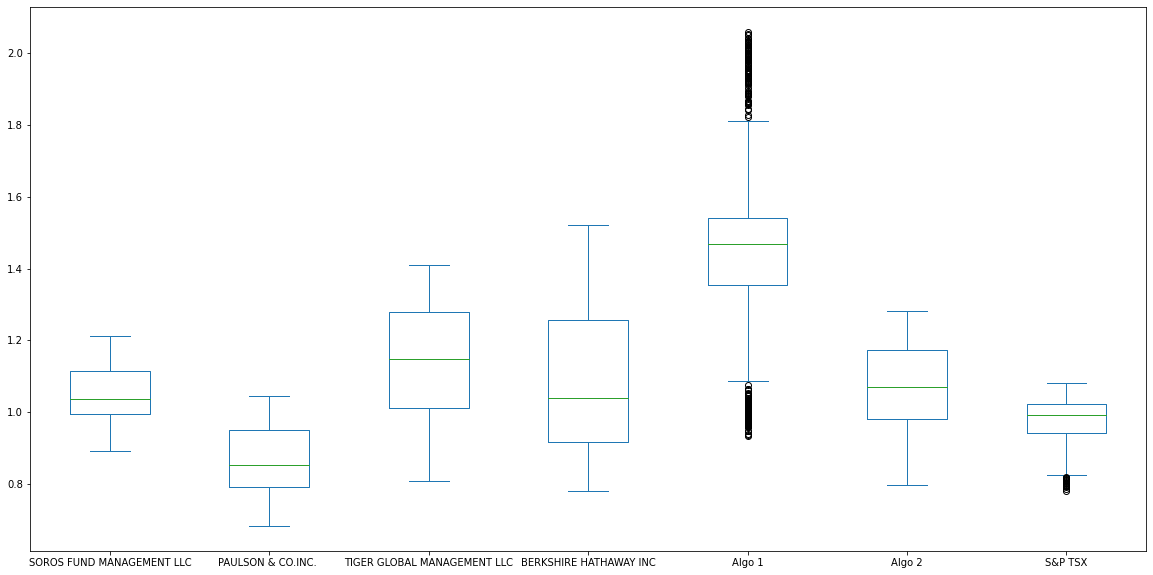

In [21]:
# Box plot to visually show risk
cumulative_returns.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [22]:
# Calculate the daily standard deviations of all portfolios
joined_std=joined_df.std()        #joined_std is the variable for standard deviation of the whole portfolio
joined_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [23]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_std=dreturn_sp.std()
sp_std
# Determine which portfolios are riskier than the S&P TSX 60
joined_std=joined_std.sort_values(ascending=False)
joined_std

#Based on the results, only "PAULSON & CO .INC" is less riskier than S&P TSX 60

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX                        0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

### Calculate the Annualized Standard Deviation

In [24]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = joined_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
S&P TSX                        0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

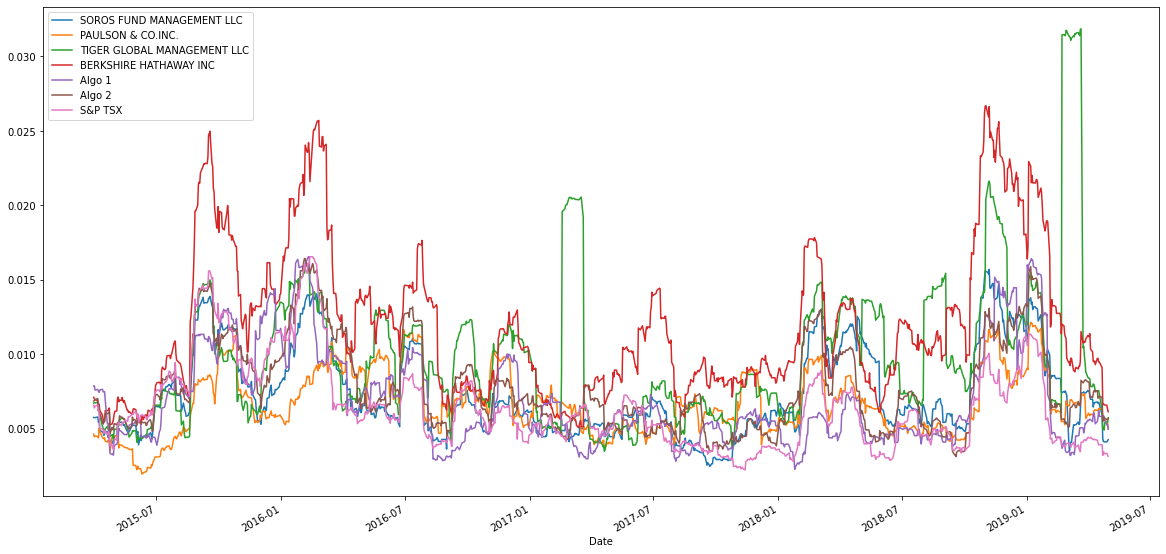

In [25]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_port_std = joined_df.rolling(window=21).std()      #rolling_port_std is the variable to assign the rolling standard deviation for all portfolios

# Plot the rolling standard deviation
rolling_port_std.plot(figsize=(20,10))

### Calculate and plot the correlation

In [26]:
# Calculate the correlation
correlation = joined_df.corr()
# Display de correlation matrix
correlation
#Since the correlation between "S&P TSX 60" and "Algo 2" is the highest (0.7373), the "Algo 2" portfolio may mimick "S&P TSX 60" the best.

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

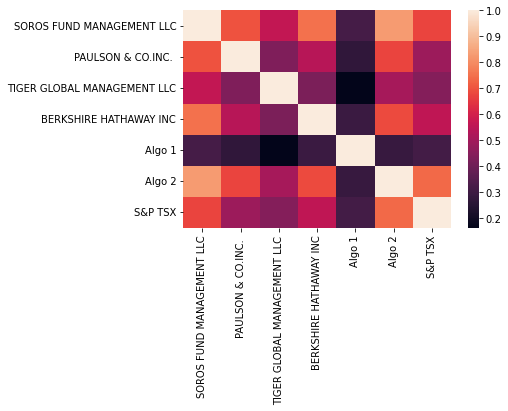

In [27]:
#Plot correlation heatmap
import seaborn as sns
sns.heatmap(correlation)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

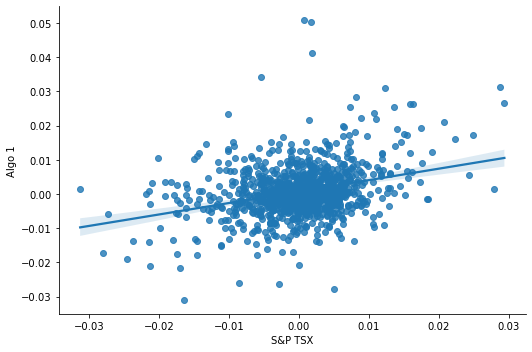

In [28]:
# Calculate covariance of a single portfolio (I will pick "Algo_1")
covariance_algo1_sptsx = joined_df['Algo 1'].cov(joined_df['S&P TSX'])
covariance_algo1_sptsx

# Calculate variance of S&P TSX
variance_sptsx=joined_df['S&P TSX'].var()
variance_sptsx

# Computing beta
beta_algo1=covariance_algo1_sptsx/variance_sptsx
beta_algo1

# Plot beta trend
import seaborn as sns
sns.lmplot(x='S&P TSX', y='Algo 1', data=joined_df, aspect=1.5, fit_reg=True)

In [29]:
beta_algo1

0.3347445908185686

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [32]:
# Use `ewm` to calculate the rolling window
joined_std_ewm = joined_df.ewm(span=21).std().dropna()
joined_std_ewm

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002658,0.004896,0.002519,0.006934,0.004182,0.002645,0.004928
2015-03-06,0.005515,0.004592,0.004808,0.009585,0.003386,0.007399,0.005286
2015-03-09,0.004716,0.004434,0.005702,0.008103,0.002929,0.006422,0.004514
2015-03-10,0.005961,0.004742,0.007166,0.007819,0.002894,0.007478,0.005572
...,...,...,...,...,...,...,...
2019-04-25,0.004767,0.005043,0.007945,0.007519,0.005244,0.006296,0.003693
2019-04-26,0.004939,0.005553,0.008451,0.007602,0.005078,0.006178,0.003543
2019-04-29,0.004717,0.005332,0.008217,0.007288,0.005059,0.005922,0.003421


<AxesSubplot:xlabel='Date'>

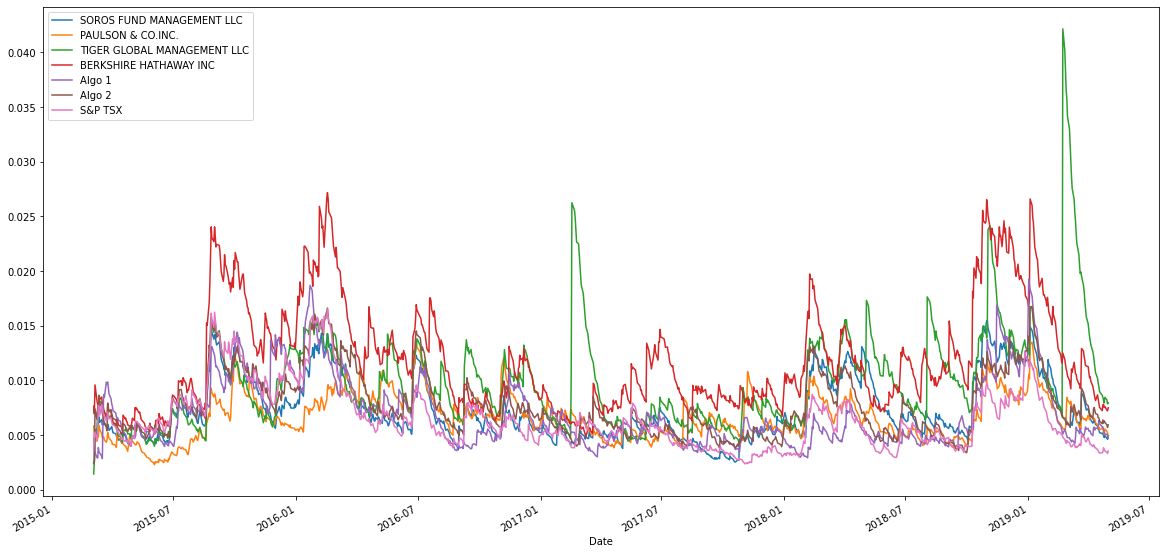

In [33]:
joined_std_ewm.plot(figsize=(20,10), title= "21-day Expotentially Weighted Average of Standard Deviation" )

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [35]:
# Annualized Sharpe Ratios
#Used the "risk_free_rate.csv" from class exercise as the data for risk free rate
risk_free_path=Path("Resources/risk_free_rate.csv")
risk_free_df=pd.read_csv(risk_free_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
all_portfolios_returns = pd.concat([joined_df, risk_free_df], axis='columns', join='inner')
sharpe_ratios = ((all_portfolios_returns.mean()-all_portfolios_returns['rf_rate'].mean()) * 252) / (all_portfolios_returns.std() * np.sqrt(252))
sharpe_ratios=sharpe_ratios.sort_values(ascending=False)
sharpe_ratios


Algo 1                         1.261160
BERKSHIRE HATHAWAY INC         0.365945
Algo 2                         0.204389
SOROS FUND MANAGEMENT LLC      0.115847
S&P TSX                        0.010658
rf_rate                        0.000000
TIGER GLOBAL MANAGEMENT LLC   -0.284988
PAULSON & CO.INC.             -0.756068
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

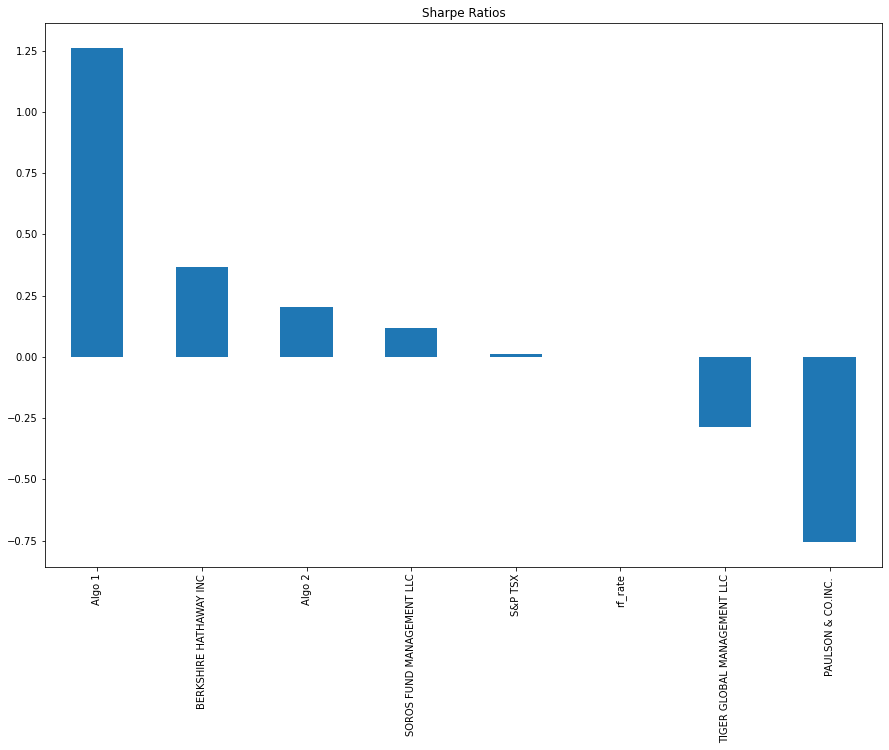

In [36]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios", figsize=(15,10))

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

In [ ]:
#We will look at a few points here in order to determine whether algorithmic strategies outperform both S&P TSX 60 and whales portfolios:
#Using cumulative returns, we see that both Algo_1 and Algo_2 having values in the top 3. And Algo_1 has the best cumulative returns. Berkshire Hathaway INC was the 2nd.
#Looking at annualised standard deviation, Algo portfolios were not the highest, ranked at 3rd and 5th, whereas Berkshire Hathaway INC was the riskiest portfolio.
#Algo_1 has the highest Sharpe ratio among other portfolios, hence, for each unit of risk, it rewards more return. Also Algo_2 ranked 3rd among the portfolio. 
#With all the above factors considered, algorithmic strategies proved to outperform both the S&P TSX 60 and the whales portfolios. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [37]:
# Reading data from 1st stock and set Date as index. 
rio_path=Path("Resources/RIO.csv")
rio_df = pd.read_csv(rio_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
#Rename column "Close" to "RIO" to represent the stock daily closing price.
rio_column=["RIO"]
rio_df.columns = rio_column
rio_df.head()

,RIO
Date,
2015-03-03,27.041296
2015-04-03,26.505667
2015-05-03,26.132105
2015-06-03,25.419462
2015-09-03,25.356247


In [38]:
#Check data type of rio_df
rio_df.dtypes

RIO    float64
dtype: object

In [39]:
# Reading data from 2nd stock and set Date as index. 
dbx_path=Path("Resources/DBX.csv")
dbx_df=pd.read_csv(dbx_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
#Rename column "Close" to "DBX" to represent the stock daily closing price.
dbx_column=["DBX"]
dbx_df.columns = dbx_column
dbx_df.head()

,DBX
Date,
2018-03-26,30.450001
2018-03-27,29.900000
2018-03-28,30.980000
2018-03-29,31.250000
2018-04-02,30.010000


In [40]:
#Check data type of dbx.df
dbx_df.dtypes

DBX    float64
dtype: object

In [42]:
# Reading data from 3rd stock and set Date as index.
tsla_path=Path("Resources/TSLA.csv")
tsla_df=pd.read_csv(tsla_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
#Rename column "Close" to "TSLA" to represent the stock daily closing price.
tsla_column=["TSLA"]
tsla_df.columns = tsla_column
tsla_df.head()

,TSLA
Date,
2015-03-03,39.911999
2015-04-03,40.487999
2015-05-03,40.125999
2015-06-03,38.776001
2015-09-03,38.175999


In [44]:
#Checx data type of tsla_df
tsla_df.dtypes

TSLA    float64
dtype: object

In [45]:
# Combine all stocks in a single DataFrame
concat_own = pd.concat([rio_df, dbx_df, tsla_df], axis='columns', join='inner')
concat_own

,RIO,DBX,TSLA
Date,,,
2018-05-01,35.735119,30.900000,63.316002
2018-08-01,36.462402,27.809999,67.281998
2018-10-01,36.744137,26.219999,66.959999
2018-11-01,37.504181,23.719999,67.589996
2018-05-02,34.916103,31.010000,66.625999
...,...,...,...
2019-04-24,44.445591,23.400000,51.731998
2019-04-25,44.378281,23.650000,49.526001
2019-04-26,44.348366,24.350000,47.028000


In [46]:
# Calculate daily returns
concat_own_dreturn=concat_own.pct_change()
# Drop NAs
concat_own_dreturn=concat_own_dreturn.dropna()
concat_own_dreturn.isnull().sum()
# Display sample data
concat_own_dreturn.head()

,RIO,DBX,TSLA
Date,,,
2018-08-01,0.020352,-0.100000,0.062638
2018-10-01,0.007727,-0.057174,-0.004786
2018-11-01,0.020685,-0.095347,0.009409
2018-05-02,-0.069008,0.307336,-0.014262
2018-07-02,0.011447,0.057723,0.035632


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [47]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
weighted_own_return=concat_own_dreturn.dot(weights)
# Display sample data
weighted_own_return.head()

Date
2018-08-01   -0.005670
2018-10-01   -0.018078
2018-11-01   -0.021751
2018-05-02    0.074688
2018-07-02    0.034934
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [48]:
# Join your returns DataFrame to the original returns DataFrame
all_return = pd.concat([weighted_own_return,joined_df], axis='columns', join='inner')
# Rename the first column name to "Own Portfolio"
all_return.rename(columns={0:"Own Portfolio"},inplace=True)
#Check data
all_return.head()

,Own Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,,
2018-08-01,-0.005670,-0.015330,-0.005112,-0.011223,0.000135,0.006178,-0.002942,-0.003483
2018-10-01,-0.018078,-0.004046,0.000251,0.006181,-0.005250,-0.002388,-0.001319,0.001947
2018-11-01,-0.021751,0.015545,0.022372,0.022348,0.020185,0.028359,0.019114,0.008176
2018-05-02,0.074688,-0.007923,-0.011448,-0.019454,0.000131,0.005558,0.001319,0.000576
2018-08-02,-0.069230,0.002427,-0.000982,0.002729,0.009181,-0.000459,0.004759,0.001978


In [49]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
#Check null first
all_return.isnull().sum()

Own Portfolio                  0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P TSX                        0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [50]:
# Calculate the annualized `std`
#Calculate std first
all_std=all_return.std()
all_std
# Now calculate annualised 'std'
annualized_all_std = all_std * np.sqrt(252)
annualized_all_std=annualized_all_std.sort_values(ascending=False)
annualized_all_std

Own Portfolio                  0.547875
BERKSHIRE HATHAWAY INC         0.240963
TIGER GLOBAL MANAGEMENT LLC    0.230653
SOROS FUND MANAGEMENT LLC      0.149410
Algo 2                         0.135983
Algo 1                         0.134120
PAULSON & CO.INC.              0.115108
S&P TSX                        0.099830
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21-day Rolling Standard Deviation'}, xlabel='Date'>

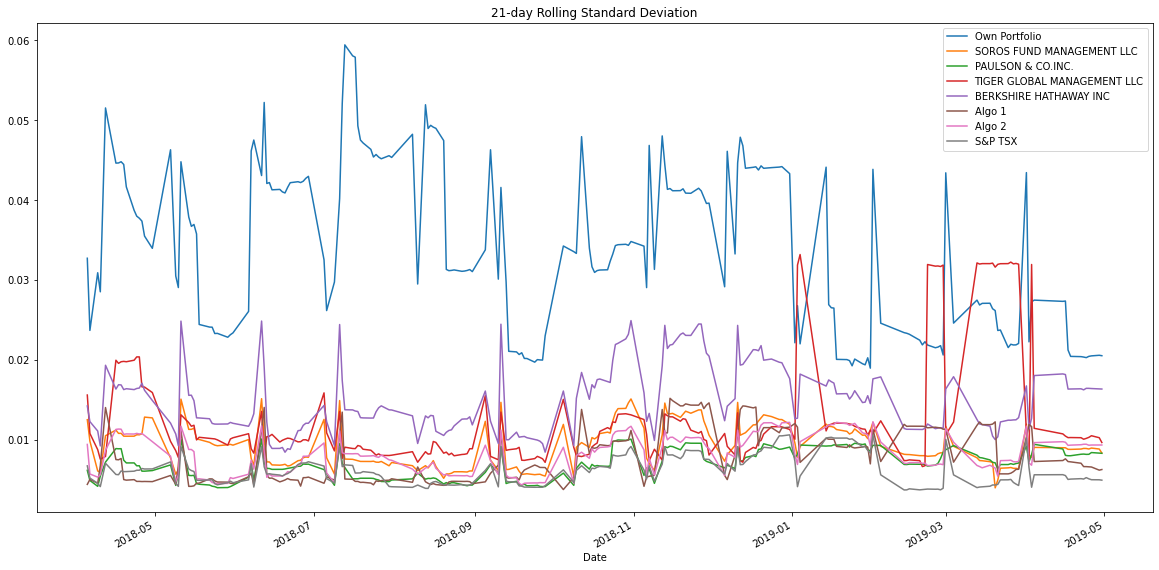

In [51]:
# Calculate rolling standard deviation
all_rolling_std = all_return.rolling(window=21).std().dropna()
# Plot rolling standard deviation
all_rolling_std.plot(figsize=(20,10), title = '21-day Rolling Standard Deviation')

### Calculate and plot the correlation

In [52]:
# Calculate and plot the correlation
all_correlation=all_return.corr()
all_correlation

,Own Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Own Portfolio,1.000000,0.193685,0.126392,0.102294,0.272494,0.049168,0.219687,0.191297
SOROS FUND MANAGEMENT LLC,0.193685,1.000000,0.754482,0.486663,0.792662,0.329941,0.831340,0.677119
PAULSON & CO.INC.,0.126392,0.754482,1.000000,0.500181,0.645550,0.346905,0.778717,0.609956
TIGER GLOBAL MANAGEMENT LLC,0.102294,0.486663,0.500181,1.000000,0.331479,0.118331,0.435477,0.401618
BERKSHIRE HATHAWAY INC,0.272494,0.792662,0.645550,0.331479,1.000000,0.317170,0.799275,0.664499
Algo 1,0.049168,0.329941,0.346905,0.118331,0.317170,1.000000,0.370615,0.298936
Algo 2,0.219687,0.831340,0.778717,0.435477,0.799275,0.370615,1.000000,0.743881
S&P TSX,0.191297,0.677119,0.609956,0.401618,0.664499,0.298936,0.743881,1.000000


<AxesSubplot:>

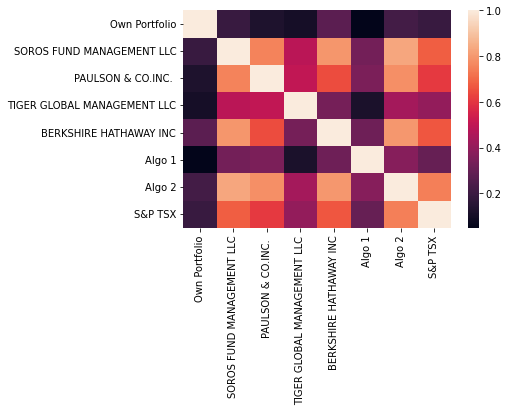

In [53]:
# Use seaborn to plot heatmap of correlation
sns.heatmap(all_correlation)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [54]:
# Calculate and plot Beta

# Calculate 60-day rolling covariance of own portfolio to S&P 60 TSX    
roll60_cov_own_sptsx =all_return["Own Portfolio"].rolling(window=60).cov(all_return['S&P TSX'])

# Calculate 60-day rolling variance of S&P 60 TSX
roll60_var_sptsx=all_return['S&P TSX'].rolling(window=60).var()

# Computing 60-day rolling beta of own portfolio against S&P 60 TSX
roll60_beta_own=roll60_cov_own_sptsx/roll60_var_sptsx
roll60_beta_own=roll60_beta_own.dropna()
roll60_beta_own

Date
2018-06-21    1.305732
2018-06-22    1.170253
2018-06-25    1.211336
2018-06-26    1.354009
2018-06-27    1.370499
                ...   
2019-04-24    0.848805
2019-04-25    0.872695
2019-04-26    0.790688
2019-04-29    1.546634
2019-04-30    1.532427
Length: 172, dtype: float64

<AxesSubplot:title={'center':'60-day Rolling Beta of Own Portfolio'}, xlabel='Date'>

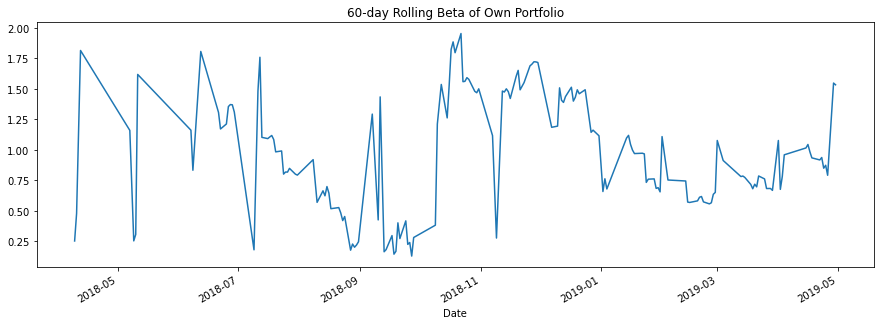

In [55]:
# Plot beta trend
roll60_beta_own.plot(figsize=(15,5), title="60-day Rolling Beta of Own Portfolio")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [58]:
# Calculate Annualized Sharpe Ratios
#First, concat the all_return data frame with risk_free_df
adj_all_return = pd.concat([all_return, risk_free_df], axis='columns', join='inner')
adj_all_return.isnull().sum()
#Calculate annualised Sharpe Ratios
all_return_sharpe = ((adj_all_return.mean()-adj_all_return["rf_rate"].mean()) * 252) / (adj_all_return.std() * np.sqrt(252))
all_return_sharpe=all_return_sharpe.sort_values(ascending=False)
all_return_sharpe

Algo 1                         1.547194
Own Portfolio                  0.483551
S&P TSX                        0.051948
rf_rate                        0.000000
BERKSHIRE HATHAWAY INC        -0.212399
SOROS FUND MANAGEMENT LLC     -0.355655
PAULSON & CO.INC.             -0.456401
Algo 2                        -0.481544
TIGER GLOBAL MANAGEMENT LLC   -0.702943
dtype: float64

<AxesSubplot:title={'center':'Sharpe ratios'}>

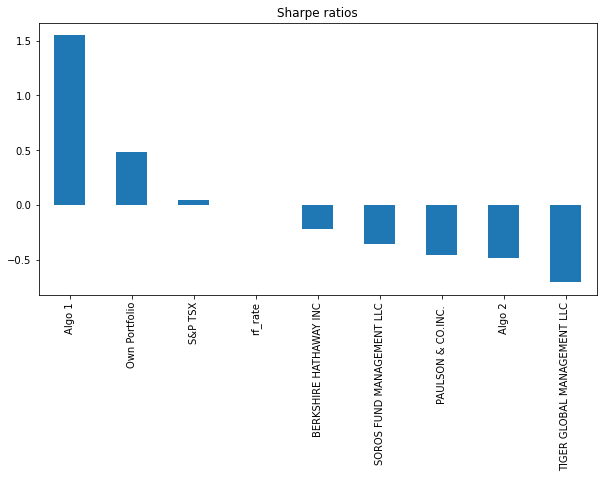

In [59]:
# Visualize the sharpe ratios as a bar plot
all_return_sharpe.plot(kind='bar', title='Sharpe ratios', figsize=(10,5))

### How does your portfolio do?

Write your answer here!

In [ ]:
#There are few factors to consider the performance of the "Own Portfolio":
#    1. Highest annualised standard deviation: it has the riskiest portfolio compared to the others.
#   2. Relative small correlation with S&P 60 TSX. This suggests that this portfolio is not moving strongly with S&P 60 TSX, and by adding this to S&P 60 TSX, we can increase diversification by a small degree.
#    3. However, it has the second highest sharpe ratio. It indicates that this portfolio rewards risks better than the other porfolios, but less than the Algo_1.
    
#One reason to explain the high volatility of "Own Portfolio" is that it includes "TSLA" which is a highly volatile stock. 